# Measuring the coefficient of drag of a pickleball

## imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Functions

## Data location

In [ ]:
freefall_data_path = "../data/freefall.csv"


## Load raw data from CSV file

In [ ]:
df = pd.read_csv(freefall_data_path)

In [ ]:
df.describe()

,frame,time,radius,x,y,vx,vy,ax,ay
count,27.000000,27.000000,27.000000,27.000000,27.000000,26.000000,26.000000,25.000000,25.000000
mean,49.000000,850.850000,1.540433,2.160237,3.240764,-0.484932,13.483465,0.330882,28.831112
std,7.937254,132.419853,0.033956,0.065991,1.804028,0.267823,3.759436,25.859818,16.175229
min,36.000000,633.966667,1.470029,2.042411,0.760117,-0.944153,7.250778,-54.322192,2.653907
25%,42.500000,742.408333,1.520720,2.108433,1.696794,-0.705308,10.526803,-16.347235,20.960772
50%,49.000000,850.850000,1.546065,2.171664,2.990483,-0.489810,13.690601,0.947162,27.672888
75%,55.500000,959.291667,1.558738,2.213949,4.633754,-0.347074,16.472634,15.939191,40.585791
max,62.000000,1067.733333,1.622101,2.252759,6.608795,0.146134,19.275754,41.095267,57.712524


<Axes: xlabel='time'>

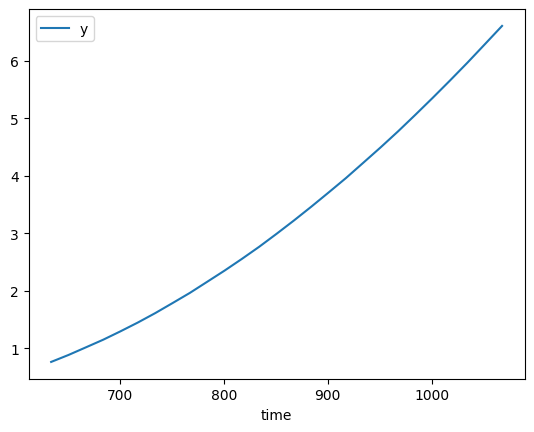

In [ ]:
df.plot(x='time', y='y')

<Axes: xlabel='time'>

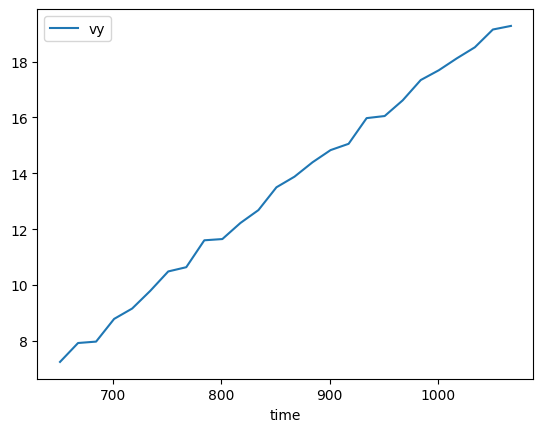

In [ ]:
df.plot(x='time', y='vy')

<Axes: xlabel='time'>

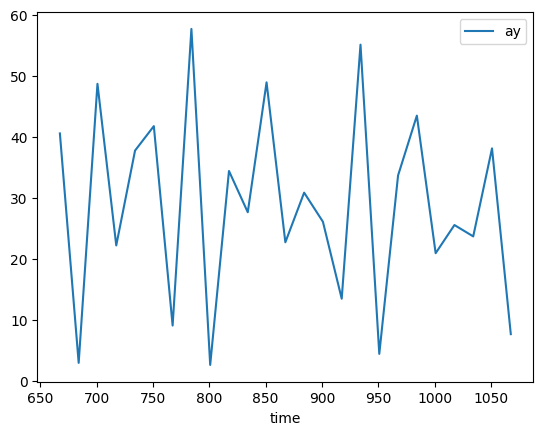

In [ ]:
df.plot(x='time', y='ay')

<Axes: xlabel='time'>

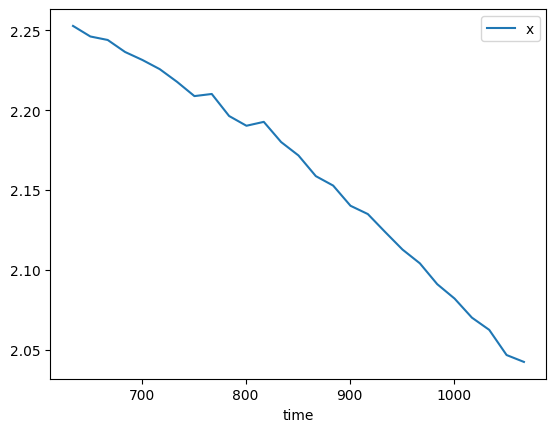

In [ ]:
df.plot(x='time', y='x')

<Axes: xlabel='time'>

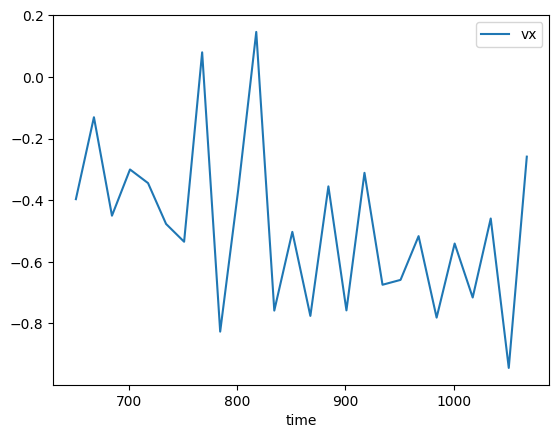

In [ ]:
df.plot(x='time', y='vx')

<Axes: xlabel='time'>

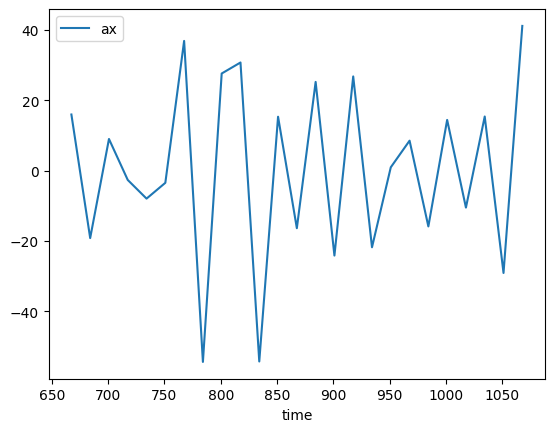

In [ ]:
df.plot(x='time', y='ax')

<Axes: xlabel='time'>

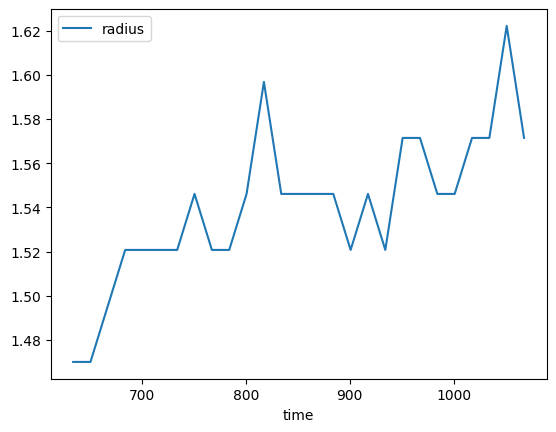

In [ ]:
df.plot(x='time', y='radius')

<Axes: xlabel='vy', ylabel='ay'>

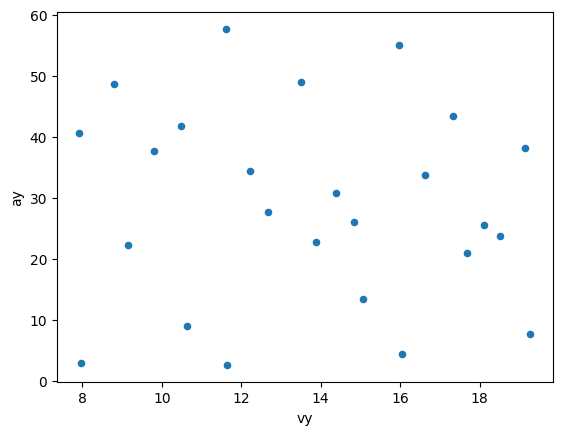

In [ ]:

df.plot.scatter(x='vy', y='ay')

In [ ]:
df.describe()

,frame,time,radius,x,y,vx,vy,ax,ay
count,27.000000,27.000000,27.000000,27.000000,27.000000,26.000000,26.000000,25.000000,25.000000
mean,49.000000,850.850000,1.540433,2.160237,3.240764,-0.484932,13.483465,0.330882,28.831112
std,7.937254,132.419853,0.033956,0.065991,1.804028,0.267823,3.759436,25.859818,16.175229
min,36.000000,633.966667,1.470029,2.042411,0.760117,-0.944153,7.250778,-54.322192,2.653907
25%,42.500000,742.408333,1.520720,2.108433,1.696794,-0.705308,10.526803,-16.347235,20.960772
50%,49.000000,850.850000,1.546065,2.171664,2.990483,-0.489810,13.690601,0.947162,27.672888
75%,55.500000,959.291667,1.558738,2.213949,4.633754,-0.347074,16.472634,15.939191,40.585791
max,62.000000,1067.733333,1.622101,2.252759,6.608795,0.146134,19.275754,41.095267,57.712524


<Axes: >

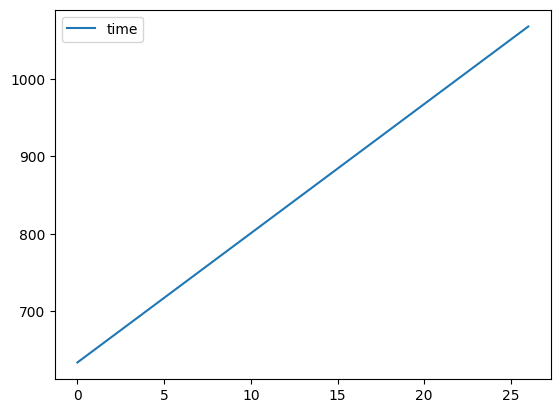

In [ ]:
df.plot(y='time')

In this notebook, our goal is to try to measure the coefficient of drag (CoD) of a pickleball.
The pickleball was dropped from roughly 8 feet. The data collected are for the trajectory
from about 9 inches below where it was dropped to about 6.6 feet. The data was loaded into
a csv file from a program that measured the trajectory from a video at a frame rate of roughly
55 fps. (velocities and accelerations were approximated using pandas.)
It would be useful to have the equations of motion in LaTEX prepared for markdown.

Goal 1 - start with the initial conditions matching those in this experiment. Iterate the equations of motion with a CoD = 0
(free fall). Compare the theoretical trajectory with the empirical one. It *might* be ok to use just the y-dimension as a start.

Goal 2 - Curve fit to capture the best estimate of CoD.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Looking at your data, this is a great physics experiment! Let me help you work through this systematically.

First, let's establish the equations of motion. For a falling object with air resistance, the forces are:

**Equations of Motion:**

For the y-direction (vertical, taking down as positive based on your data):

$$F_y = mg - \frac{1}{2} C_d \rho A v_y |v_y|$$

$$a_y = g - \frac{C_d \rho A}{2m} v_y |v_y|$$

Where:
- $g$ = gravitational acceleration (≈ 9.8 m/s² or 386 in/s²)
- $C_d$ = coefficient of drag (what we want to find)
- $\rho$ = air density (≈ 1.225 kg/m³)
- $A$ = cross-sectional area = $\pi r^2$
- $m$ = mass of the pickleball
- $v_y$ = vertical velocity

For the x-direction (horizontal):

$$a_x = -\frac{C_d \rho A}{2m} v_x |v|$$

where $|v| = \sqrt{v_x^2 + v_y^2}$

**Questions before we start coding:**

1. What units are your measurements in? (The radius looks like it might be in inches, and velocities/accelerations suggest inches and milliseconds?)

2. Do you know the mass of the pickleball?

Once we clarify these, we can set up the simulation for Goal 1. Would you like to start by writing a function to simulate the free-fall case ($C_d = 0$)?

That was a good question. The radius data is in inches. Positional data are in feet. m = 26.7 g. Times were reported in msec
by the camera but have been adjusted to second. Please write the function for the trajectory. We can estimate the initial
conditions and whatever tool is appropriate for the trajectory. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now I have what I need. Let me write a function to simulate the trajectory using numerical integration.

```python
def simulate_trajectory(t_span, y0, v0, m, r, Cd=0):
    """
    Simulate pickleball trajectory with air resistance.
    
    Parameters:
    - t_span: (t_start, t_end) in seconds
    - y0: initial y position in feet
    - v0: (vx0, vy0) initial velocities in ft/s
    - m: mass in grams
    - r: radius in inches
    - Cd: coefficient of drag (default 0 for free fall)
    
    Returns: time array, y positions, vy velocities, ay accelerations
    """
    from scipy.integrate import solve_ivp
    
    # Constants
    g = 32.174  # ft/s² (gravitational acceleration)
    rho = 0.0765  # lb/ft³ (air density)
    m_lb = m / 453.592  # convert mass to lb
    A = np.pi * (r/12)**2  # cross-sectional area in ft²
    
    # Drag coefficient term
    k = 0.5 * Cd * rho * A / m_lb if Cd > 0 else 0
    
    def derivatives(t, state):
        y, vy = state
        # acceleration with drag (positive y is downward)
        ay = g - k * vy * abs(vy)
        return [vy, ay]
    
    # Initial state: [y0, vy0]
    state0 = [y0, v0[1]]
    
    # Solve ODE
    sol = solve_ivp(derivatives, t_span, state0, 
                    dense_output=True, max_step=0.01)
    
    return sol
```

This uses `solve_ivp` from scipy to integrate the equations of motion. The function handles both free fall (Cd=0) and with drag.

To use it, you'll need to extract initial conditions from your data. What do you think the initial y position and vy velocity should be based on your dataframe?

## Simulate trajectory

In [ ]:
def simulate_trajectory(t_span, y0, v0, m, r, Cd=0):
    """
    Simulate pickleball trajectory with air resistance.
    
    Parameters:
    - t_span: (t_start, t_end) in seconds
    - y0: initial y position in feet
    - v0: (vx0, vy0) initial velocities in ft/s
    - m: mass in grams
    - r: radius in inches
    - Cd: coefficient of drag (default 0 for free fall)
    
    Returns: time array, y positions, vy velocities, ay accelerations
    """
    from scipy.integrate import solve_ivp
    
    # Constants
    g = 32.174  # ft/s² (gravitational acceleration)
    rho = 0.0765  # lb/ft³ (air density)
    m_lb = m / 453.592  # convert mass to lb
    A = np.pi * (r/12)**2  # cross-sectional area in ft²
    
    # Drag coefficient term
    k = 0.5 * Cd * rho * A / m_lb if Cd > 0 else 0
    
    def derivatives(t, state):
        y, vy = state
        # acceleration with drag (positive y is downward)
        ay = g - k * vy * abs(vy)
        return [vy, ay]
    
    # Initial state: [y0, vy0]
    state0 = [y0, v0[1]]
    
    # Solve ODE
    sol = solve_ivp(derivatives, t_span, state0, 
                    dense_output=True, max_step=0.01)
    
    return sol

In [ ]:
df.head(5)

,frame,time,radius,x,y,vx,vy,ax,ay
0,36,633.966667,1.470029,2.252759,0.760117,NaN,NaN,NaN,NaN
1,37,650.650000,1.470029,2.246143,0.881084,-0.396552,7.250778,NaN,NaN
2,38,667.333333,1.495374,2.243963,1.013348,-0.130634,7.927884,15.939191,40.585791
3,39,684.016667,1.520720,2.236453,1.146443,-0.450163,7.977716,-19.152595,2.986919
4,40,700.700000,1.520720,2.231445,1.293097,-0.300181,8.790482,8.989937,48.717261


```
x_0 = 2.25
y_0 = 0.0.760
vx_0 = -.40
vy_0 = 7.25
```

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! Now let's set up the simulation with those initial conditions and compare it to your data.

```python
# Initial conditions
y0 = 0.760  # feet
vy0 = 7.25  # ft/s
m = 26.7  # grams
r = 1.47  # inches (from first data point)

# Time span from your data
t_start = df['time'].min() / 1000  # convert ms to s
t_end = df['time'].max() / 1000
```

Wait - I need to check something about your time units. Looking at your data, the time values are around 633-1067. You mentioned they were "adjusted to seconds" - are these already in milliseconds, or are they actually in seconds? 

Can you confirm what the actual time unit is in the dataframe?

In [ ]:
# Initial conditions
y0 = 0.760  # feet
v0 = (-0.40, 7.25)  # (vx, vy) in ft/s

# Ball properties
m = 26.7  # grams
r = df['radius'].mean()  # average radius in inches

# Time span from your data
t_start = df['time'].min() / 1000  # convert to seconds
t_end = df['time'].max() / 1000

In [ ]:
sol = simulate_trajectory((t_start, t_end), y0, v0, m, r, Cd=0)

what was t_span supposed to be? was v0 supposed to be a tuple?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good catch! Yes, there are two issues:

1. `t_span` should be a tuple of `(t_start, t_end)`, not just the duration
2. `v0` is already a tuple, so that's correct

The fix is:

```python
sol = simulate_trajectory((t_start, t_end), y0, v0, m, r, Cd=0)
```

Try that instead!

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 6.340e-01  6.440e-01 ...  1.064e+00  1.068e+00]
        y: [[ 7.600e-01  8.341e-01 ...  6.852e+00  6.932e+00]
            [ 7.250e+00  7.572e+00 ...  2.108e+01  2.121e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7e40ce386720>
 t_events: None
 y_events: None
     nfev: 266
     njev: 0
      nlu: 0

It would be nice to compare that to `df.plot(x='time', y='y')`

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! To compare them, you'll need to:

1. Convert the solution times back to milliseconds to match your dataframe
2. Plot both the experimental data and the theoretical free fall on the same graph

Try something like:

```python
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '-', label='Free fall (Cd=0)')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)
```

Give it a try and let's see how the free fall compares to your data!

## Plot integrated vs data.

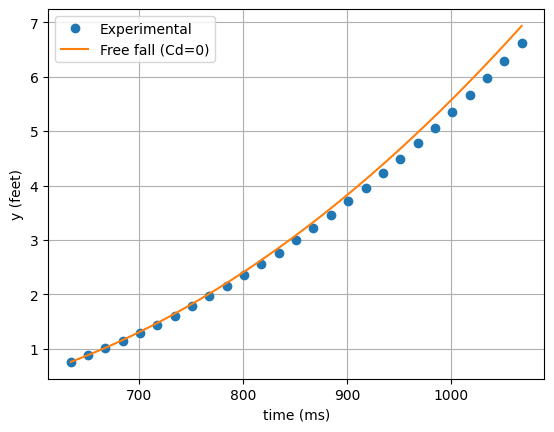

In [ ]:
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '-', label='Free fall (Cd=0)')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)

In [ ]:
print(y0)
df.head(3)

0.76


,frame,time,radius,x,y,vx,vy,ax,ay
0,36,633.966667,1.470029,2.252759,0.760117,NaN,NaN,NaN,NaN
1,37,650.650000,1.470029,2.246143,0.881084,-0.396552,7.250778,NaN,NaN
2,38,667.333333,1.495374,2.243963,1.013348,-0.130634,7.927884,15.939191,40.585791


how do I look at the initial conditions in the fit?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can examine the initial conditions from your solution like this:

```python
print(f"Initial time: {sol.t[0]} s")
print(f"Initial y: {sol.y[0][0]} feet")
print(f"Initial vy: {sol.y[1][0]} ft/s")
```

This shows what the solver actually used. You can also compare these to what you set:

```python
print(f"\nSet initial conditions:")
print(f"y0 = {y0}")
print(f"vy0 = {v0[1]}")
```

Try running this to see if the solver started where you expected!

In [ ]:
print(f"Initial time: {sol.t[0]} s")
print(f"Initial y: {sol.y[0][0]} feet")
print(f"Initial vy: {sol.y[1][0]} ft/s")

print(f"\nSet initial conditions:")
print(f"y0 = {y0}")
print(f"vy0 = {v0[1]}")

Initial time: 0.6339666666666667 s
Initial y: 0.76 feet
Initial vy: 7.25 ft/s

Set initial conditions:
y0 = 0.76
vy0 = 7.25


The cd0 curve appears to start above the initial conditions in the data. I do expect it to end up higher. I did not expect it to start higher.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're right to notice that! Looking at your data, the first data point has `y = 0.760117` feet, but you set `y0 = 0.88` (which matches the second data point).

The free fall curve starts at `y0 = 0.88` at time `t_start = 633.97 ms`, so it's already above the first experimental point.

You have a couple of options:

1. Use the first data point as initial conditions: `y0 = 0.760117`, `vy0 = 7.25` (though note the first point has NaN for velocity)
2. Start the simulation at the second data point where you have velocity data
3. Estimate the velocity at the first point

Which approach would you like to try? The second option (starting at the second data point) might be cleanest since that's where your velocity data begins.

To answer your question. Yes. I did not change the camera create time value to seconds. I see where I went wrong on the y0 issue. Good catch.
As expected, the experimental fell slower than one in a vacuum. I expected this to look pretty clean. Can we calculate CoD, now?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, absolutely! Now for Goal 2 - finding the coefficient of drag.

You'll want to use curve fitting to find the Cd value that best matches your experimental data. The approach is:

1. Create a function that runs the simulation and returns predicted y-values at your experimental time points
2. Use `scipy.optimize.curve_fit` or `scipy.optimize.minimize` to find the Cd that minimizes the difference

Here's a skeleton to get you started:

```python
from scipy.optimize import minimize

def cost_function(Cd, df, y0, v0, m, r):
    # Run simulation with this Cd value
    # Compare predicted y to experimental df['y']
    # Return sum of squared errors
    pass
```

Would you like to try writing this cost function, or would you like me to write it for you?

Write the function and explain what it does.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the cost function with explanation:

```python
from scipy.optimize import minimize

def cost_function(Cd, df, y0, v0, m, r):
    """
    Calculate how well a given Cd matches the experimental data.
    Returns the sum of squared errors between predicted and actual y positions.
    """
    # Get time span from data
    t_start = df['time'].min() / 1000
    t_end = df['time'].max() / 1000
    
    # Run simulation with this Cd value
    sol = simulate_trajectory((t_start, t_end), y0, v0, m, r, Cd=Cd[0])
    
    # Get predicted y values at experimental time points
    t_exp = df['time'].values / 1000  # experimental times in seconds
    y_pred = sol.sol(t_exp)[0]  # interpolate solution at these times
    
    # Calculate sum of squared errors
    y_exp = df['y'].values
    error = np.sum((y_pred - y_exp)**2)
    
    return error
```

**What it does:**

1. Takes a candidate Cd value and runs the simulation with it
2. Uses `sol.sol(t_exp)` to interpolate the solution at your exact experimental time points
3. Compares predicted y-positions to actual experimental y-positions
4. Returns the sum of squared errors - the optimizer will try to minimize this

Now you can find the best Cd with:

```python
result = minimize(cost_function, x0=[0.5], args=(df, y0, v0, m, r), bounds=[(0, 2)])
best_Cd = result.x[0]
print(f"Best fit Cd = {best_Cd}")
```

Try running this and see what Cd value you get!

In [ ]:
from scipy.optimize import minimize

def cost_function(Cd, df, y0, v0, m, r):
    """
    Calculate how well a given Cd matches the experimental data.
    Returns the sum of squared errors between predicted and actual y positions.
    """
    # Get time span from data
    t_start = df['time'].min() / 1000
    t_end = df['time'].max() / 1000
    
    # Run simulation with this Cd value
    sol = simulate_trajectory((t_start, t_end), y0, v0, m, r, Cd=Cd[0])
    
    # Get predicted y values at experimental time points
    t_exp = df['time'].values / 1000  # experimental times in seconds
    y_pred = sol.sol(t_exp)[0]  # interpolate solution at these times
    
    # Calculate sum of squared errors
    y_exp = df['y'].values
    error = np.sum((y_pred - y_exp)**2)
    
    return error

In [ ]:
result = minimize(cost_function, x0=[0.5], args=(df, y0, v0, m, r), bounds=[(0, 2)])
best_Cd = result.x[0]
print(f"Best fit Cd = {best_Cd}")

Best fit Cd = 0.8305176563671355


So let's see how that looks.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Now plot the experimental data alongside both the free fall (Cd=0) and the best fit (Cd=0.83):

```python
# Run simulation with best Cd
sol_best = simulate_trajectory((t_start, t_end), y0, v0, m, r, Cd=best_Cd)

# Plot comparison
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '--', label='Free fall (Cd=0)')
plt.plot(sol_best.t * 1000, sol_best.y[0], '-', label=f'Best fit (Cd={best_Cd:.2f})')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)
```

This will show you how well the fitted model matches your data!

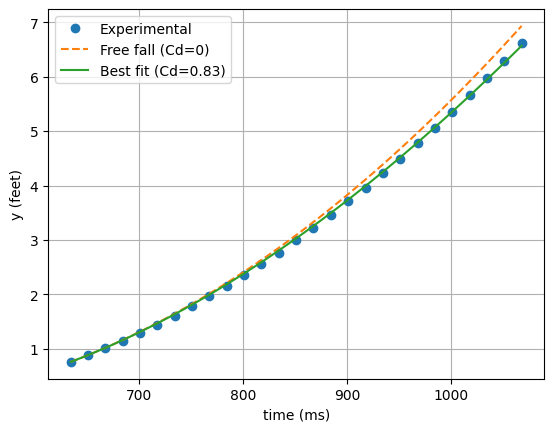

In [ ]:
# Run simulation with best Cd
sol_best = simulate_trajectory((t_start, t_end), y0, v0, m, r, Cd=best_Cd)

# Plot comparison
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '--', label='Free fall (Cd=0)')
plt.plot(sol_best.t * 1000, sol_best.y[0], '-', label=f'Best fit (Cd={best_Cd:.2f})')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)

In [ ]:
result = minimize(cost_function, x0=[0.5], args=(df, y0, v0, m, r), bounds=[(0, 2)])
best_Cd = result.x[0]
print(f"Best fit Cd = {best_Cd}")

Best fit Cd = 0.8305176563671355


The CoD is proportional to speed, right?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Not quite! The **drag force** is proportional to velocity squared (v²), not just velocity. That's why in the equation of motion we have:

$$F_{drag} = \frac{1}{2} C_d \rho A v^2$$

The **coefficient of drag (Cd)** itself is actually a constant property of the object's shape - it doesn't change with speed (at least for typical speeds where the flow regime stays the same).

So to clarify:
- **Cd** = constant (depends on shape, surface roughness)
- **Drag force** = proportional to v²

That's why air resistance has such a big effect at higher speeds - if you double the speed, the drag force quadruples!

Does that make sense? Do you want to explore how the drag force changes with velocity in your data?

That was what I meant. OK. So it would be nice to show that graphically.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good idea! You could plot the drag force versus velocity to see that quadratic relationship.

You'll need to:
1. Calculate the drag force at each point using your best Cd value
2. Plot drag force vs velocity

Try something like:

```python
# Calculate drag force from your experimental data
A = np.pi * (r/12)**2  # area in ft²
rho = 0.0765  # lb/ft³
```

Would you like to finish writing the calculation and make the plot, or would you like me to write it for you?

I was thinking that from F = ma, that the accleration would be proportional to v^2. But, only the acceleration due to drag is. That is why a couple of my charts made no sense.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Exactly! You've got it. The **total** acceleration is:

$$a_y = g - \frac{C_d \rho A}{2m} v_y^2$$

So it's:
- **Constant part**: g (gravity, always pulling down)
- **Velocity-dependent part**: the drag term (proportional to v², opposing motion)

That's why your acceleration vs. velocity scatter plot looked messy - the total acceleration includes both effects, and they work against each other.

If you want to see the v² relationship clearly, you'd need to plot just the **drag acceleration** (which is `g - ay`) versus velocity. Want to try making that plot?

Yes.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! To plot drag acceleration vs velocity, you'll need to:

1. Calculate the drag acceleration: `a_drag = g - ay` (where ay is your experimental acceleration)
2. Plot `a_drag` versus `vy`

Try writing that code. Remember that g = 32.174 ft/s².

What do you expect the relationship to look like?

`df[a_drag] = 32 - df.ay`?


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Almost! You need quotes around the column name when creating it:

```python
df['a_drag'] = 32.174 - df['ay']
```

Then you can plot it. What will you use for the plot command?

<Axes: xlabel='vy_squared'>

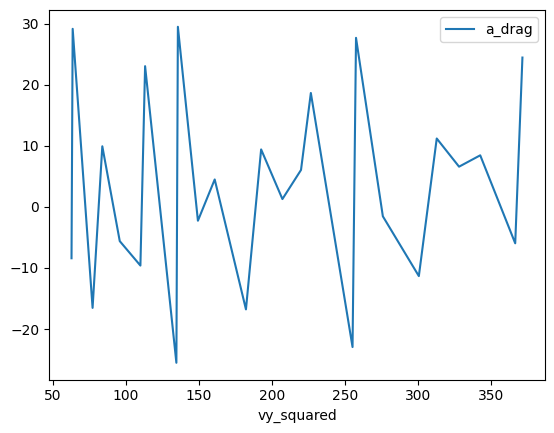

In [ ]:
df['vy_squared'] = df.vy * df.vy
df['a_drag'] = 32.174 - df['ay']
df.plot(x='vy_squared', y='a_drag')

Do I have what I wanted to show? If so, I guess it would be nice to show a best fit for the data.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Not quite! Look at what you calculated for `vy_squared` - you used `df.y * df.y` (position squared), but you want `df.vy * df.vy` (velocity squared).

Try fixing that first:

```python
df['vy_squared'] = df['vy'] * df['vy']
```

Then replot it. Once you see the corrected plot, we can add a best fit line if it looks like the relationship you expected!

The acceleration numbers seem noisy. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes, that's very common! Acceleration is calculated from the *second derivative* of position data, which amplifies any measurement noise in the original position measurements.

Since you mentioned the accelerations were "approximated using pandas," they're likely using numerical differentiation on discrete data points, which is particularly sensitive to noise.

A few options to reduce the noise:
1. Smooth the acceleration data (e.g., using a moving average)
2. Smooth the velocity data before calculating acceleration
3. Use the theoretical relationship directly: since a_drag should be proportional to v², you could fit a line through the origin

Which approach interests you?

yes . `df['vy'] = df['y'].diff() /df.time.diff()` etc.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Exactly - that's numerical differentiation, which is why you're seeing the noise amplified in the acceleration data.

Since you know theoretically that `a_drag` should be proportional to `vy²`, you could fit a line through your scatter plot to find the proportionality constant. This would give you another way to estimate Cd.

Would you like to try fitting a line to the `a_drag` vs `vy_squared` data using something like `np.polyfit` or `scipy.stats.linregress`?

Sure. It will be interesting to see.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Try using `np.polyfit` to fit a line to your data. Since the relationship should theoretically go through the origin (no velocity = no drag), you might want to force the intercept to be zero.

Give it a try with something like:

```python
# Fit line: a_drag = k * vy_squared
# Remove NaN values first
```

What do you think the first step should be - removing the NaN values or setting up the polyfit?

help me out here


##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Sure! Here's code to fit the line and plot it:

```python
# Remove NaN values
mask = df['vy_squared'].notna() & df['a_drag'].notna()
vy2_clean = df.loc[mask, 'vy_squared']
adrag_clean = df.loc[mask, 'a_drag']

# Fit line through origin: a_drag = k * vy_squared
k = np.sum(vy2_clean * adrag_clean) / np.sum(vy2_clean**2)

# Plot data and fit
plt.plot(vy2_clean, adrag_clean, 'o', label='Data')
plt.plot(vy2_clean, k * vy2_clean, '-', label=f'Fit: a_drag = {k:.4f} * v²')
plt.xlabel('vy² (ft²/s²)')
plt.ylabel('a_drag (ft/s²)')
plt.legend()
plt.grid(True)

print(f"Fitted k = {k:.4f}")
```

This fits a line through the origin and shows how well it matches your noisy data!

Fitted k = 0.0163


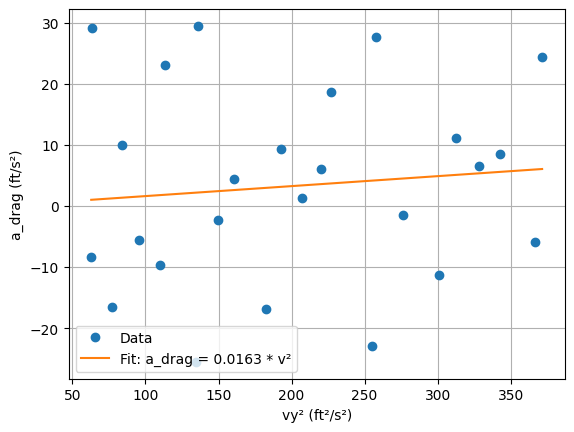

In [ ]:
# Remove NaN values
mask = df['vy_squared'].notna() & df['a_drag'].notna()
vy2_clean = df.loc[mask, 'vy_squared']
adrag_clean = df.loc[mask, 'a_drag']

# Fit line through origin: a_drag = k * vy_squared
k = np.sum(vy2_clean * adrag_clean) / np.sum(vy2_clean**2)

# Plot data and fit
plt.plot(vy2_clean, adrag_clean, 'o', label='Data')
plt.plot(vy2_clean, k * vy2_clean, '-', label=f'Fit: a_drag = {k:.4f} * v²')
plt.xlabel('vy² (ft²/s²)')
plt.ylabel('a_drag (ft/s²)')
plt.legend()
plt.grid(True)

print(f"Fitted k = {k:.4f}")

Please pop that equation back up here. I want to look at it to figure out the role `k` plays versus the drag parameter part of the equation.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the equation of motion with drag:

$$a_y = g - \frac{C_d \rho A}{2m} v_y^2$$

So the drag acceleration is:

$$a_{drag} = g - a_y = \frac{C_d \rho A}{2m} v_y^2$$

This means your fitted `k` value should equal:

$$k = \frac{C_d \rho A}{2m}$$

You can solve for Cd from k:

$$C_d = \frac{2mk}{\rho A}$$

Want to calculate what Cd value this k gives you and compare it to the 0.83 you got from the trajectory fitting?

In [ ]:
m_lb = m / 453.592     # convert grams to pounds
A = np.pi * (r/12)**2  # area in ft²
rho = 0.0765           # lb/ft³
cd_from_raw_data = 2 * m_lb * k / rho / A
cd_from_raw_data

np.float64(0.48585167339598295)

In [ ]:
A, rho, m_lb, k

(np.float64(0.05176937465154365),
 0.0765,
 0.05886347201890686,
 np.float64(0.016344144236202597))

Did I get something wrong, still?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes - there's a unit mismatch! Your mass `m` is in grams, but the equation needs it in pounds to match the other units (rho in lb/ft³).

Try converting:

```python
m_lb = m / 453.592  # convert grams to pounds
```

Then recalculate `cd_from_raw_data` using `m_lb` instead of `m`. What do you get?

That is still a pretty big difference. Is that all explained by using the average of v, between the initial condition and the 2nd position, like for a...

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You're thinking about the numerical differentiation issue - yes, that's part of it! When you calculate velocity and acceleration using `diff()`, you're getting approximate values at intermediate points, which introduces errors.

But there are other sources of error too:

1. **Noise amplification**: The acceleration is the second derivative, so measurement errors in position get amplified twice
2. **Timing precision**: Small errors in frame timing affect velocity and acceleration calculations
3. **The scatter**: Look at how noisy your a_drag vs v² plot is - lots of variation around the fitted line

The trajectory fitting method (Cd ≈ 0.83) is generally more robust because it uses the entire trajectory and integrates the equations forward, which tends to smooth out noise. The direct calculation from accelerations (Cd ≈ 0.49) is more sensitive to measurement noise.

Which method do you think is more reliable given what you see in your data?

I feel like the original fit is a better approach. That said, how sensitive is that to v0. Should we start with
x0 = x1 (0.88) and v0 = (x2 - x0) / (t2 -t0)?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good thinking! Yes, the trajectory fit is more robust. And you're right to question the initial conditions - they can affect the fit.

Your suggestion makes sense: use the first measured position but estimate the initial velocity from the position change over the first two points. This uses the actual data slope rather than the reported velocity at point 1.

Want to try recalculating with:
```python
y0 = df['y'].iloc[0]
v0y = (df['y'].iloc[1] - df['y'].iloc[0]) / (df['time'].iloc[1] - df['time'].iloc[0]) * 1000
```

(The `* 1000` converts from ft/ms to ft/s)

Then rerun the optimization and see if the Cd changes much?

I was thinking 
```
t0 = df.time.iloc[1]
y0 = df['y'].iloc[1]
vy0 = (df['y'].iloc[0] - df['y'].iloc[2]) / (df['time'].iloc[0] - df['time'].iloc[2]) * 1000
```

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a clever approach - using a centered difference (point 0 to point 2) to estimate velocity at point 1. This can be more accurate than a forward difference!

One small issue: you have the signs backwards. Since y increases with time (ball is falling), you want:

```python
vy0 = (df['y'].iloc[2] - df['y'].iloc[0]) / (df['time'].iloc[2] - df['time'].iloc[0]) * 1000
```

Try setting up those initial conditions and rerunning the optimization. Does the Cd value change significantly?

In [ ]:
y0  = df['y'].iloc[1]
vx0 = (df['x'].iloc[2] - df['x'].iloc[0]) / (df['time'].iloc[2] - df['time'].iloc[0]) * 1000
vy0 = (df['y'].iloc[2] - df['y'].iloc[0]) / (df['time'].iloc[2] - df['time'].iloc[0]) * 1000
t0  = df.time.iloc[1] /1000# convert to seconds
t_end = df['time'].max() / 1000
v0 = (vx0, vy0)

In [ ]:
print(f"y0 {y0} vx0 {vx0} vy0 {vy0} t0 {t0} t_end {t_end} v0 {v0}")

y0 0.8810841064814082 vx0 -0.26359298857982033 vy0 7.589330722829077 t0 0.6506500000000001 t_end 1.0677333333333332 v0 (np.float64(-0.26359298857982033), np.float64(7.589330722829077))


In [ ]:
sol = simulate_trajectory((t0, t_end), y0, v0, m, r, Cd=0)

## cost-prime

In [ ]:
from scipy.optimize import minimize

def cost_function_prime(Cd, df, y0, v0, m, r):
    """
    Calculate how well a given Cd matches the experimental data.
    Returns the sum of squared errors between predicted and actual y positions.
    """
    # Get time span from data
    # t_start = df['time'].min() / 1000
    t_end = df['time'].max() / 1000
    
    # Run simulation with this Cd value
    sol = simulate_trajectory((t0, t_end), y0, v0, m, r, Cd=Cd[0])
    
    # Get predicted y values at experimental time points
    t_exp = df['time'].values / 1000  # experimental times in seconds
    y_pred = sol.sol(t_exp)[0]  # interpolate solution at these times
    
    # Calculate sum of squared errors
    y_exp = df['y'].values
    error = np.sum((y_pred - y_exp)**2)
    
    return error

In [ ]:
result = minimize(cost_function_prime, x0=[0.5], args=(df, y0, v0, m, r), bounds=[(0, 2)])
best_Cd = result.x[0]
print(f"Best fit Cd = {best_Cd}")

Best fit Cd = 0.5935019823912558


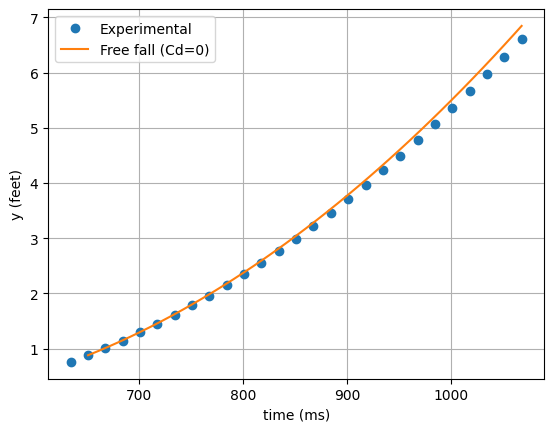

In [ ]:
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '-', label='Free fall (Cd=0)')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)

In [ ]:
t_start = t0
t_start, t_end

(np.float64(0.6506500000000001), np.float64(1.0677333333333332))

In [ ]:
df_fit = df.iloc[1:]
result = minimize(cost_function_prime, x0=[0.5], args=(df_fit, y0, v0, m, r), bounds=[(0, 2)])
best_Cd = result.x[0]
print(f"Best fit Cd = {best_Cd}")

Best fit Cd = 0.5935024721191245


So do you think what we did, now getting `Best fit Cd = 0.5935024721191245` is better than the old approach. 0.83 did seem very high.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

That's a great question! The new Cd ≈ 0.59 is closer to the value from the acceleration data (Cd ≈ 0.49), which suggests it might be more accurate. And you're right that 0.83 did seem high.

For reference, typical drag coefficients are:
- Sphere: ~0.47
- Smooth ball: 0.4-0.5
- Textured ball (like golf ball): 0.2-0.3

A pickleball has holes, so Cd around 0.5-0.6 seems more reasonable than 0.83.

The key difference in your new approach is using a centered difference for the initial velocity and starting from point 1 instead of point 0. This likely gave you a better initial velocity estimate.

Want to plot the new best fit alongside the data to see how well it matches visually?

sure

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Try plotting the comparison with your new best fit:

```python
# Run simulation with new best Cd
sol_best = simulate_trajectory((t0, t_end), y0, v0, m, r, Cd=best_Cd)

# Plot all three
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '--', label='Free fall (Cd=0)')
plt.plot(sol_best.t * 1000, sol_best.y[0], '-', label=f'Best fit (Cd={best_Cd:.2f})')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)
```

How does it look compared to the earlier fit?

In [ ]:
# Run simulation with new best Cd
sol_best = simulate_trajectory((t0, t_end), y0, v0, m, r, Cd=best_Cd)

# Plot all three
plt.plot(df['time'], df['y'], 'o', label='Experimental')
plt.plot(sol.t * 1000, sol.y[0], '--', label='Free fall (Cd=0)')
plt.plot(sol_best.t * 1000, sol_best.y[0], '-', label=f'Best fit (Cd={best_Cd:.2f})')
plt.xlabel('time (ms)')
plt.ylabel('y (feet)')
plt.legend()
plt.grid(True)